## Neural Network for Regression.

Dataset: Camparia  et al. , 2023, CET. 

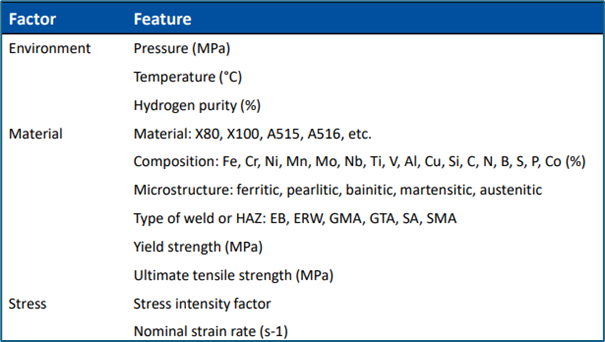

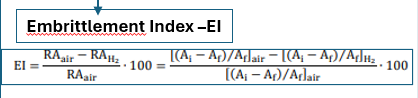

In [1]:
# In case of reloading functions
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
import os,sys
current_dir = os.getcwd()    # Get the current directory. 
sys.path.append(current_dir) # Append to path 

# To append new folder

#fn2=os.path.join(current_dir,'..','SourceCode')
#sys.path.append(fn2)         # Add the path to the folder containing imports.py

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score





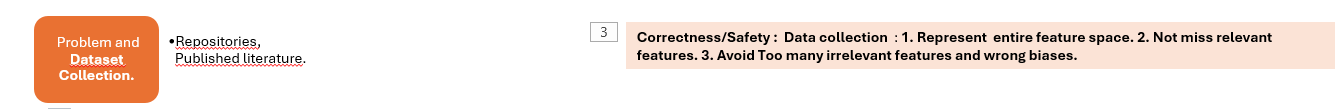

In [5]:
#Load Dataset

filename="Database.xlsx"
data = pd.read_excel(filename)

# Data Exploration 

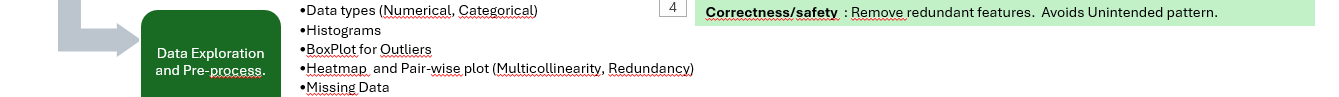

## 1. Basic Data Overview


### 1.1 Provides a concise summary of the DataFrame including data types and non-null values

In [6]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Reference                        179 non-null    object 
 1   Material type                    179 non-null    object 
 2   Material                         177 non-null    object 
 3   Fe                               176 non-null    float64
 4   Cr                               174 non-null    float64
 5   Ni                               174 non-null    float64
 6   Mn                               174 non-null    float64
 7   Mo                               174 non-null    float64
 8   Nb                               174 non-null    float64
 9   Ti                               174 non-null    float64
 10  V                                174 non-null    float64
 11  Al                               174 non-null    float64
 12  Cu                    

### 1.2 Dimensions : Returns the number of rows and columns

In [7]:

nrows,ncolumns=data.shape
print(f'number of rows - samples : {nrows} \nnumber of columns - features : {ncolumns} .')

number of rows - samples : 179 
number of columns - features : 34 .


In [8]:
data.head(2)

,Reference,Material type,Material,Fe,Cr,Ni,Mn,Mo,Nb,Ti,...,Austenitic,Weld / Not weld,Yield strength [Mpa],Ultimate tensile strength [Mpa],Temperature [°C],Pressure [MPa],Stress concentration factor,Strain rate [s-1],Embrittlement Index,Severity class
0,[1],Steel,X80,97.417,0.0,0.0,1.86,0.0,0.05,0.0,...,0.0,-,555.0,625.0,22.0,0.1,1.0,0.00005,0.0,Small
1,[1],Steel,X80,97.417,0.0,0.0,1.86,0.0,0.05,0.0,...,0.0,-,555.0,625.0,22.0,5.0,1.0,0.00005,41.0,High


### 1.3 Descriptive statistics for both numerical and categorical data

In [9]:
data.columns

Index(['Reference', 'Material type', 'Material', 'Fe', 'Cr', 'Ni', 'Mn', 'Mo',
       'Nb', 'Ti', 'V', 'Al', 'Cu', 'Si', 'C', 'N', 'B', 'S', 'P', 'Co',
       'Ferritic', 'Bainitic', 'Pearlitic', 'Martensitic', 'Austenitic',
       'Weld / Not weld', 'Yield strength [Mpa]',
       'Ultimate tensile strength [Mpa]', 'Temperature [°C]', 'Pressure [MPa]',
       'Stress concentration factor', 'Strain rate [s-1]',
       'Embrittlement Index', 'Severity class'],
      dtype='object')

In [10]:

data.describe()

,Fe,Cr,Ni,Mn,Mo,Nb,Ti,V,Al,Cu,...,Pearlitic,Martensitic,Austenitic,Yield strength [Mpa],Ultimate tensile strength [Mpa],Temperature [°C],Pressure [MPa],Stress concentration factor,Strain rate [s-1],Embrittlement Index
count,176.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,...,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,1.760000e+02,176.000000
mean,80.723551,9.777839,5.648092,2.780075,0.403736,0.040172,0.132644,0.028586,0.020207,0.031437,...,0.011932,0.025000,0.493568,570.920455,851.414773,25.636364,54.865341,2.624432,5.371704e-03,33.895455
std,16.800760,9.168177,6.730716,2.923204,0.714533,0.153418,0.496764,0.101631,0.072731,0.081046,...,0.040704,0.149475,0.500686,274.804917,352.617824,74.413391,47.119823,2.791912,4.201115e-02,29.028415
min,49.934200,0.000000,0.000000,0.053000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,200.000000,414.000000,-162.000000,0.100000,1.000000,5.500000e-07,0.000000
25%,63.832000,0.000000,0.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,386.750000,625.000000,22.000000,6.900000,1.000000,3.000000e-04,2.977500
50%,80.023000,14.020000,6.200000,1.715000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,514.500000,776.000000,22.000000,69.000000,1.000000,4.000000e-04,32.265000
75%,97.778750,18.400000,9.687500,2.000000,0.415000,0.000000,0.000000,0.001500,0.000000,0.000000,...,0.000000,0.000000,1.000000,691.750000,958.000000,22.000000,69.000000,5.500000,6.700000e-04,58.157500
max,99.870000,23.000000,30.700000,9.300000,2.670000,0.830000,3.000000,0.780000,0.420000,0.420000,...,0.150000,1.000000,1.000000,1627.000000,2730.000000,677.000000,172.000000,8.400000,5.500000e-01,100.000000


### 1.4 Check Missing Values in rows

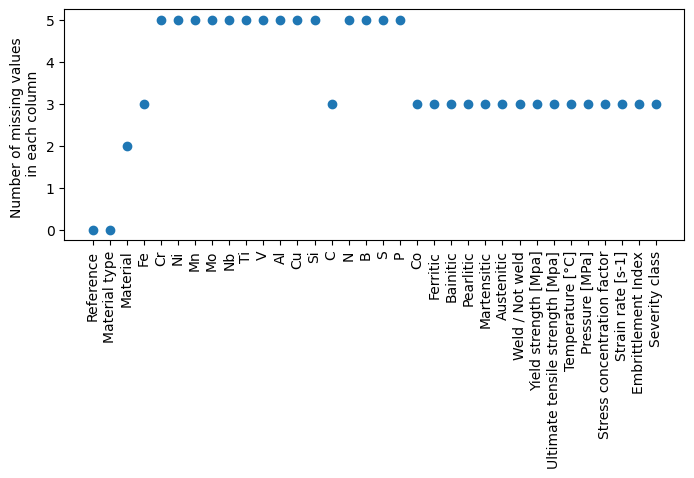

In [11]:
# Returns the number of missing values in each column
plt.figure(figsize=(8,3));
plt.plot(data.isnull().sum(),'o');
plt.ylabel("Number of missing values \n in each column");
#plt.xlabel("Column Names");
plt.xticks(rotation=90);

In [12]:
#Remove missing values and check shape
# Dropping rows with missing values
data.dropna(inplace=True)

# Dropping columns with missing values
#df.dropna(axis=1, inplace=True)

#Imputing missing values
# Filling missing values with the mean of the column
#df['numerical_column'].fillna(df['numerical_column'].mean(), inplace=True)

# Filling missing values with a specific value for categorical columns
#df['categorical_column'].fillna('Unknown', inplace=True)



In [13]:
data.shape

(174, 34)

### 1.5 BOX PLOT FOR OUTLIER DETECTION

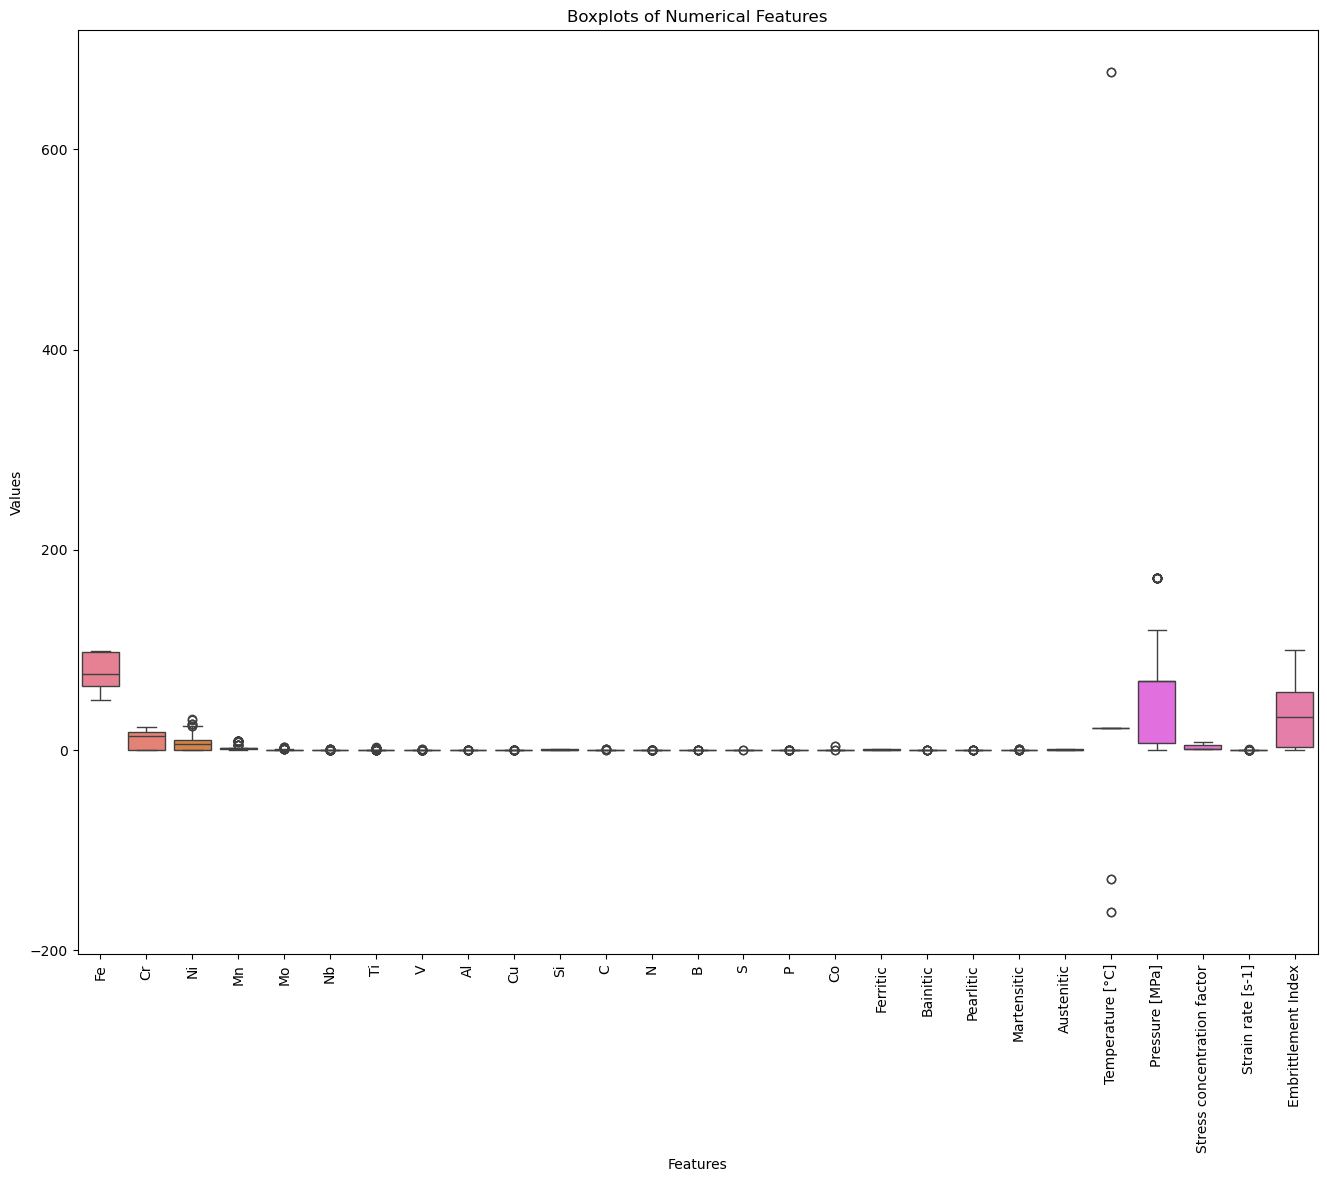

In [14]:
plt.figure(figsize=(16, 12))

numerical_df=data.select_dtypes(include=['float64', 'int64'])

sns.boxplot(data=numerical_df.loc[:, ~numerical_df.columns.isin(['Yield strength [Mpa]','Ultimate tensile strength [Mpa]'])])
plt.title('Boxplots of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.show()

In [15]:
# Returns the number of duplicate rows
data.duplicated().sum()

0

In [16]:
data.nunique()

Reference                            4
Material type                        1
Material                            33
Fe                                  59
Cr                                  43
Ni                                  44
Mn                                  50
Mo                                  27
Nb                                  11
Ti                                  11
V                                   14
Al                                  12
Cu                                  10
Si                                  39
C                                   38
N                                   13
B                                    7
S                                   30
P                                   26
Co                                   3
Ferritic                             6
Bainitic                             2
Pearlitic                            2
Martensitic                          3
Austenitic                           4
Weld / Not weld          

### 1.6 HEATMAP Correlation matrix for feature selection and redundant feature
- Feature selection - Target Variable: Features with a higher absolute correlation with the target (e.g., > 0.5) might be more valuable.
- Remove Reduandant: Look for Strong Correlations >0.85 between features + Assess importance to target + Multicollinearity and Remove one with high VIF.
- High VIF values indicate that a variable is highly correlated with other variables, which can distort the results of regression analysis. 
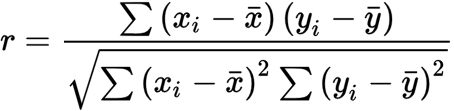

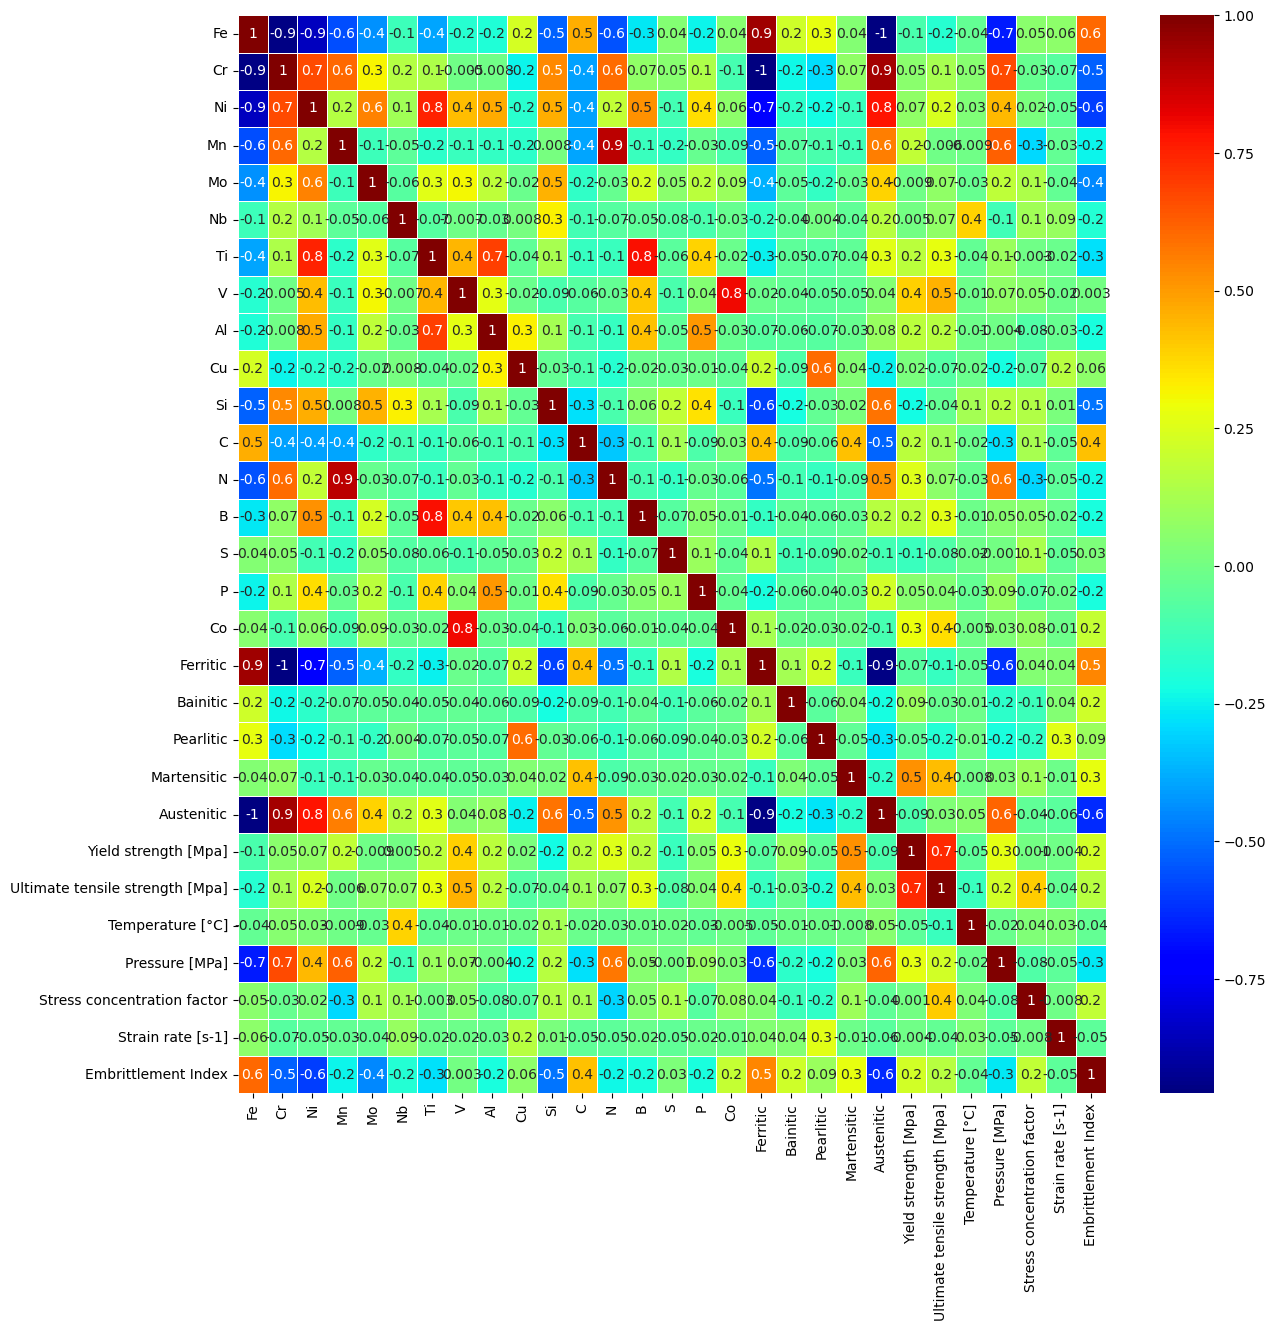

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of the correlation matrix
plt.figure(figsize=(14,14))
sns.heatmap(numerical_df.corr(), annot=True, cmap='jet', linewidths=0.5,fmt=".1g")
plt.show()

In [18]:
numerical_df.columns

Index(['Fe', 'Cr', 'Ni', 'Mn', 'Mo', 'Nb', 'Ti', 'V', 'Al', 'Cu', 'Si', 'C',
       'N', 'B', 'S', 'P', 'Co', 'Ferritic', 'Bainitic', 'Pearlitic',
       'Martensitic', 'Austenitic', 'Yield strength [Mpa]',
       'Ultimate tensile strength [Mpa]', 'Temperature [°C]', 'Pressure [MPa]',
       'Stress concentration factor', 'Strain rate [s-1]',
       'Embrittlement Index'],
      dtype='object')

# Pairplot to visualize relationships between numerical columns
sort_df=numerical_df[['Cr', 'Fe','Ferritic','Yield strength [Mpa]','Temperature [°C]', 'Pressure [MPa]','Stress concentration factor', 'Strain rate [s-1]']]
sns.pairplot(sort_df) 
plt.show()


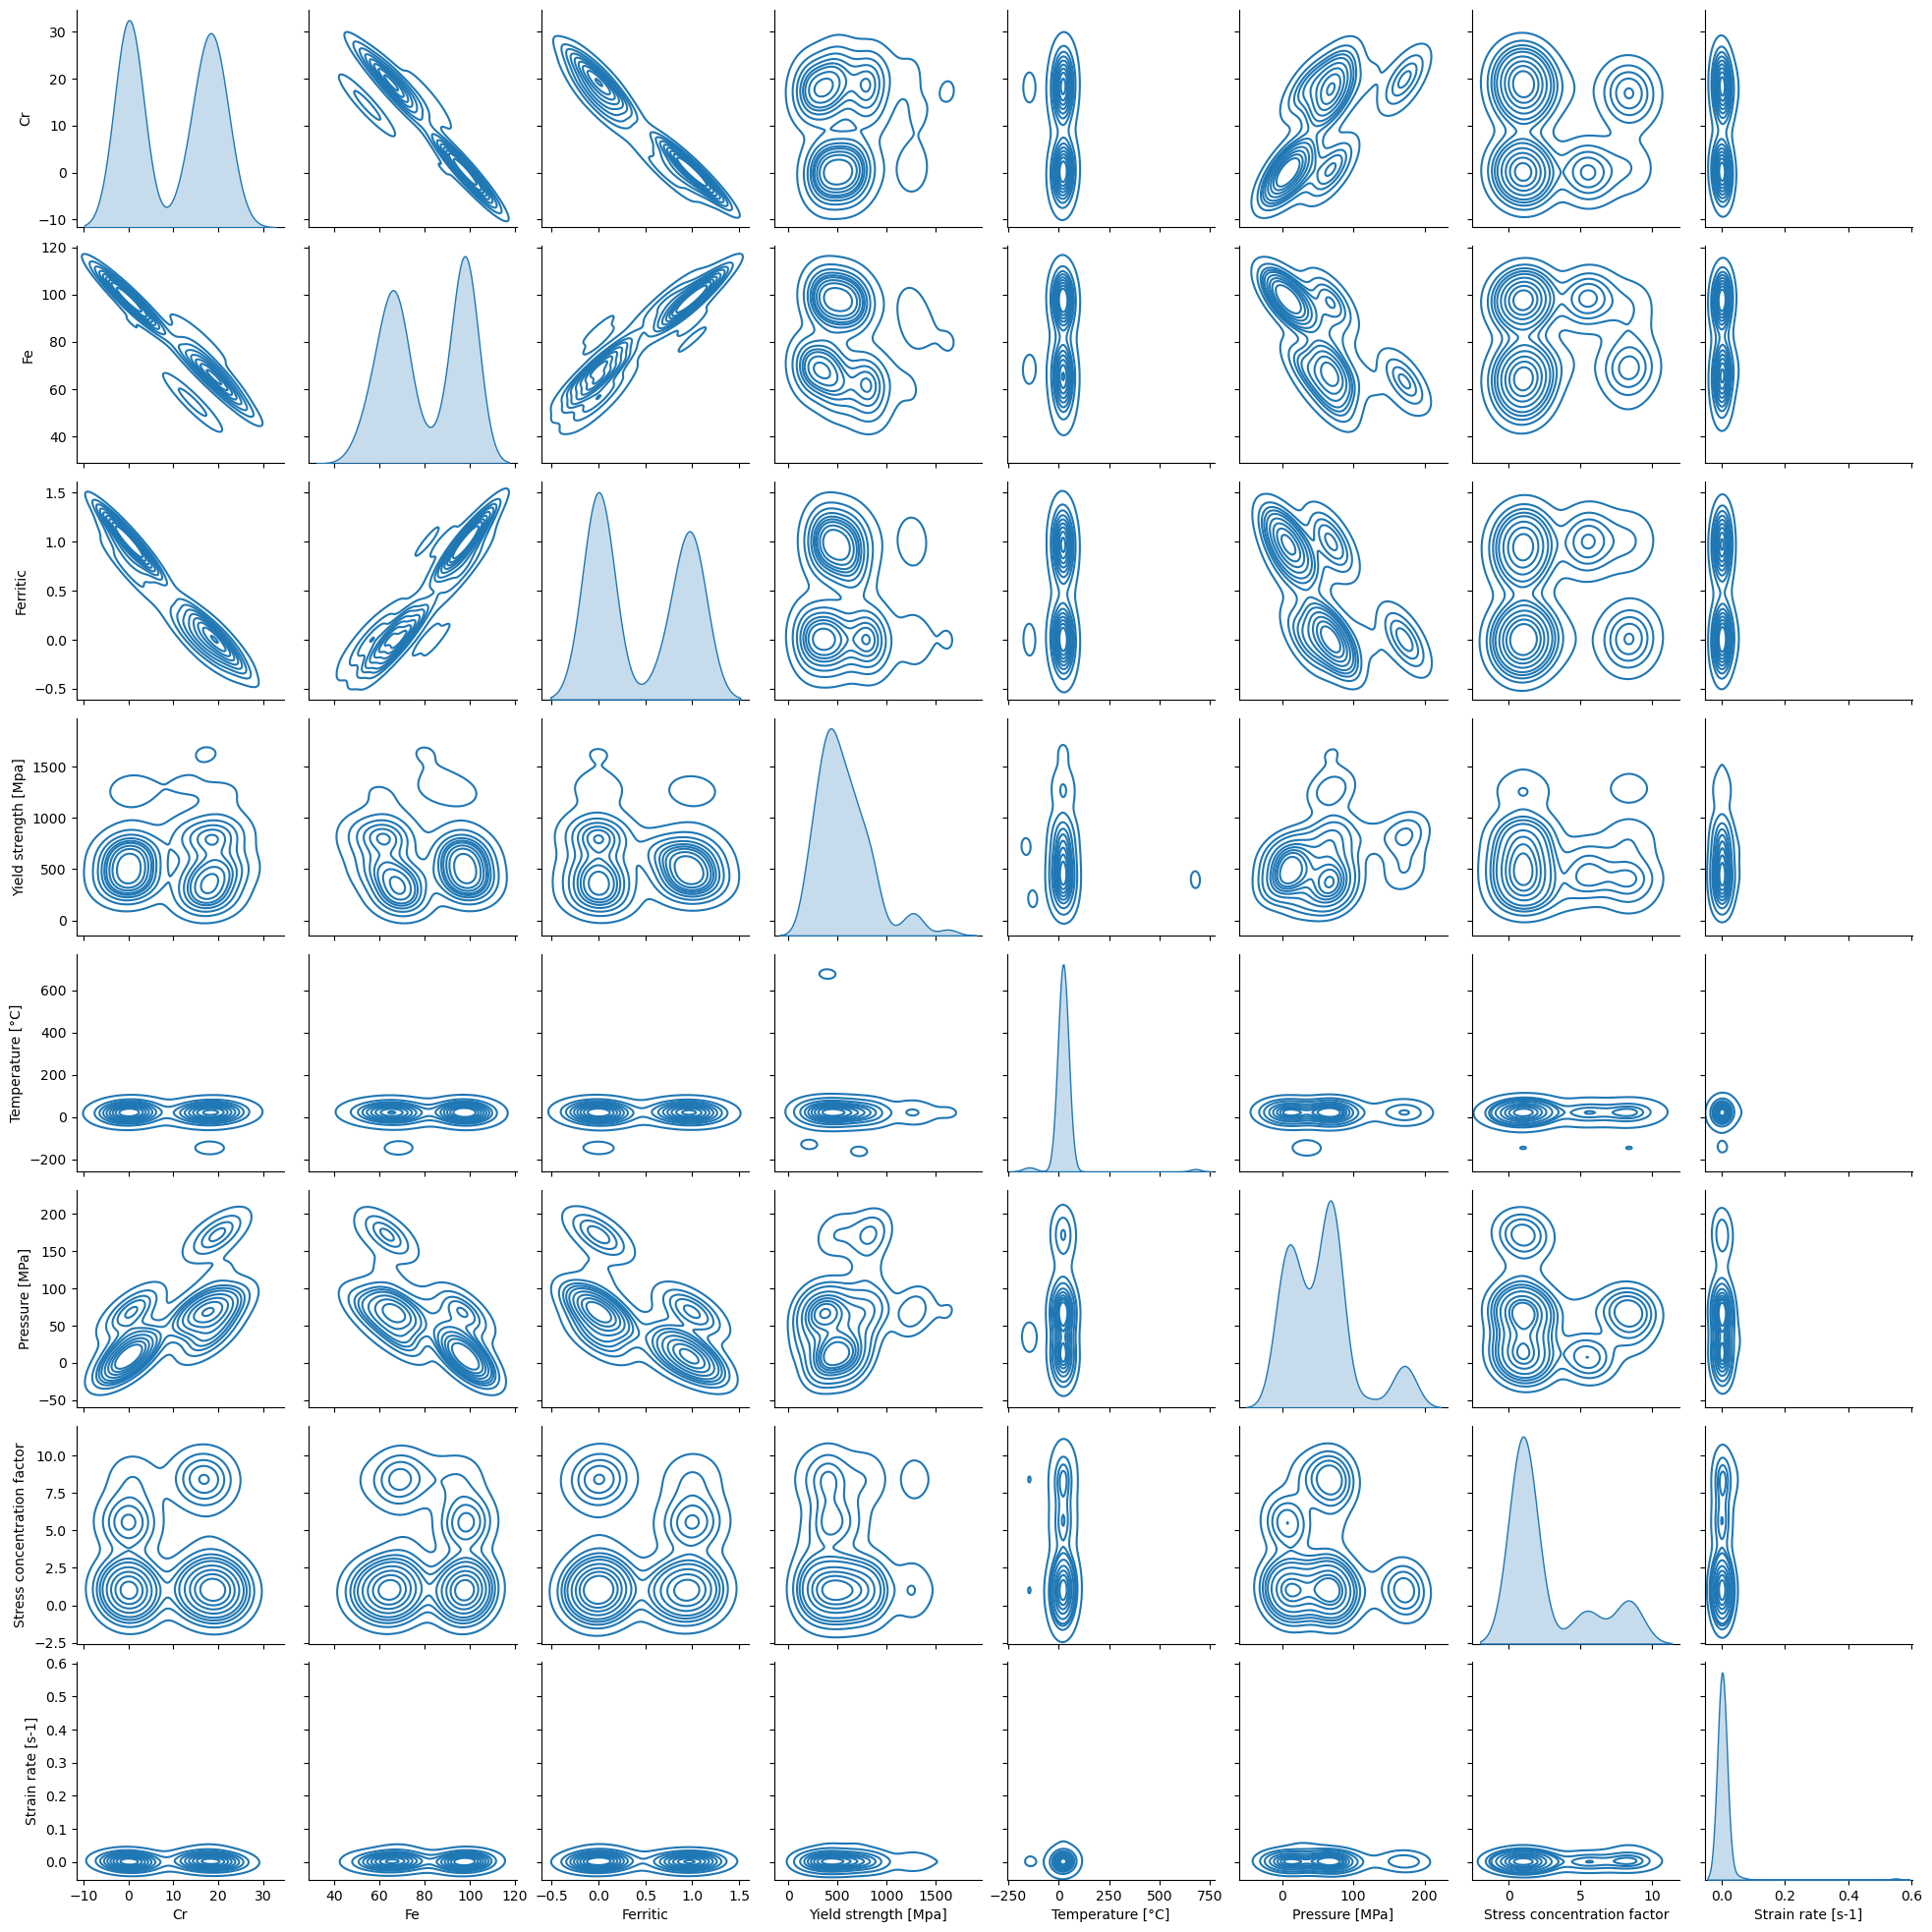

In [20]:
# Pairplot to visualize relationships between numerical columns
#sort_df=numerical_df[['Cr', 'Ferritic','Yield strength [Mpa]','Temperature [°C]', 'Pressure [MPa]','Stress concentration factor', 'Strain rate [s-1]']]
sns.pairplot(sort_df,kind="kde") 
plt.show()

In [21]:
# Select categorical columns (object or category)
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

print("Categorical Columns:")
print(categorical_columns)

Categorical Columns:
Index(['Reference', 'Material type', 'Material', 'Weld / Not weld',
       'Severity class'],
      dtype='object')


In [22]:
data[categorical_columns].nunique()

Reference           4
Material type       1
Material           33
Weld / Not weld    12
Severity class      4
dtype: int64

In [23]:
data.tail(4)

,Reference,Material type,Material,Fe,Cr,Ni,Mn,Mo,Nb,Ti,...,Austenitic,Weld / Not weld,Yield strength [Mpa],Ultimate tensile strength [Mpa],Temperature [°C],Pressure [MPa],Stress concentration factor,Strain rate [s-1],Embrittlement Index,Severity class
172,[4],Steel,A-286,53.4735,15.07,25.58,1.470,1.35,0.0,1.93,...,1.0,-,848.0,1606.0,22.0,69.0,8.4,0.00070,0.00,Small
173,[4],Steel,A-286,57.1794,14.02,24.38,0.280,1.37,0.0,2.09,...,1.0,-,843.0,1826.0,22.0,69.0,8.4,0.00070,0.00,Small
174,[4],Steel,JBK-75,50.9690,14.48,30.46,0.110,1.22,0.0,2.07,...,1.0,-,875.0,1305.0,22.0,69.0,1.0,0.00033,1.00,Small
175,[4],Steel,JBK-75,49.9342,15.50,30.70,0.053,1.20,0.0,2.10,...,1.0,-,717.0,1131.0,22.0,172.0,1.0,0.02100,7.87,Small


###  One-Hot Encoding for categorical variables

In [24]:

df_one_hot = pd.get_dummies(data[['Material']], drop_first=True)

print(df_one_hot)


     Material_321  Material_347  Material_410  Material_1020  Material_1042  \
0           False         False         False          False          False   
1           False         False         False          False          False   
2           False         False         False          False          False   
3           False         False         False          False          False   
4           False         False         False          False          False   
..            ...           ...           ...            ...            ...   
171         False         False         False          False          False   
172         False         False         False          False          False   
173         False         False         False          False          False   
174         False         False         False          False          False   
175         False         False         False          False          False   

     Material_1080  Material_4140  Material_21-6-9 

In [25]:
numerical_df[['Ferritic']].drop_duplicates()

,Ferritic
0,0.850
10,0.700
22,1.000
85,0.000
102,0.047
103,0.085


In [26]:
select_numerical_df=numerical_df[['Cr','Ni', 'Mn', 'Mo',  'Ti', 'Al', 'Cu', 'Si', 'C', 'Ferritic', 'Bainitic', 'Pearlitic','Martensitic', 'Austenitic', 'Yield strength [Mpa]','Temperature [°C]','Pressure [MPa]','Stress concentration factor', 'Strain rate [s-1]']]

In [27]:
select_numerical_df.shape

(174, 19)

In [28]:
df_one_hot.shape

(174, 32)

In [29]:
selected_features=pd.concat((df_one_hot,select_numerical_df ),axis=1)
label=numerical_df['Embrittlement Index']


In [30]:
selected_features.shape

(174, 51)

In [31]:
selected_features.columns

Index(['Material_321', 'Material_347', 'Material_410', 'Material_1020',
       'Material_1042', 'Material_1080', 'Material_4140', 'Material_21-6-9',
       'Material_22-13-5', 'Material_304L', 'Material_440C', 'Material_A-286',
       'Material_A106', 'Material_A515', 'Material_A516', 'Material_A517',
       'Material_Annealed 22-13-5', 'Material_Annealed 304L',
       'Material_Annealed 316', 'Material_Annealed 430F', 'Material_HY-100',
       'Material_HY-80', 'Material_JBK-75', 'Material_Sensitized 316',
       'Material_W69', 'Material_X100', 'Material_X42', 'Material_X52',
       'Material_X60', 'Material_X65', 'Material_X70', 'Material_X80', 'Cr',
       'Ni', 'Mn', 'Mo', 'Ti', 'Al', 'Cu', 'Si', 'C', 'Ferritic', 'Bainitic',
       'Pearlitic', 'Martensitic', 'Austenitic', 'Yield strength [Mpa]',
       'Temperature [°C]', 'Pressure [MPa]', 'Stress concentration factor',
       'Strain rate [s-1]'],
      dtype='object')

In [32]:
import pandas as pd
import statsmodels.api as sm

# Function to calculate VIF
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data['feature'] = df.columns
    vif_data['VIF'] = [sm.OLS(df[column], df.drop(column, axis=1)).fit().rsquared for column in df.columns]
    vif_data['VIF'] = 1 / (1 - vif_data['VIF'])
    return vif_data

# Calculate VIF
vif_result = calculate_vif(numerical_df)
print(vif_result)


                            feature       VIF
0                                Fe       inf
1                                Cr       inf
2                                Ni       inf
3                                Mn       inf
4                                Mo       inf
5                                Nb       inf
6                                Ti       inf
7                                 V       inf
8                                Al       inf
9                                Cu       inf
10                               Si       inf
11                                C       inf
12                                N       inf
13                                B       inf
14                                S       inf
15                                P       inf
16                               Co  8.371416
17                         Ferritic       inf
18                         Bainitic       inf
19                        Pearlitic       inf
20                      Martensiti

- Note - VIF Infinity for both X1 and X2 when as X1 + X2=1 or X1=2*X2. - remove one of them.  Alloy compositions are often constrained by a summation rule — for example, the total percentage of all elements must equal 100%. This creates perfect multicollinearity because the composition of one element is linearly dependent on the others.
- Remove one element: If the sum of all element compositions equals a constant, drop one element to eliminate perfect multicollinearity.
- Regularization: Use Ridge or Lasso regression to mitigate multicollinearity without dropping any variables.
- PCA: Reduce multicollinearity by transforming the data into uncorrelated principal components.

In [33]:
data.columns

Index(['Reference', 'Material type', 'Material', 'Fe', 'Cr', 'Ni', 'Mn', 'Mo',
       'Nb', 'Ti', 'V', 'Al', 'Cu', 'Si', 'C', 'N', 'B', 'S', 'P', 'Co',
       'Ferritic', 'Bainitic', 'Pearlitic', 'Martensitic', 'Austenitic',
       'Weld / Not weld', 'Yield strength [Mpa]',
       'Ultimate tensile strength [Mpa]', 'Temperature [°C]', 'Pressure [MPa]',
       'Stress concentration factor', 'Strain rate [s-1]',
       'Embrittlement Index', 'Severity class'],
      dtype='object')

In [34]:
# Use Selected_features and Label.

In [35]:
selected_features.shape

(174, 51)

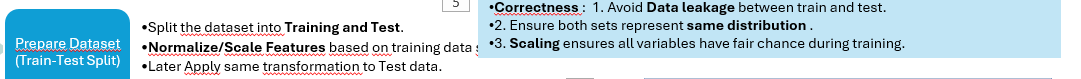

In [36]:



# 1. Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(np.array(selected_features), np.array(label), test_size=0.2, random_state=42)

# 2. Scale the input data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit to train and transform
X_test_scaled = scaler.transform(X_test)        # Transform test data



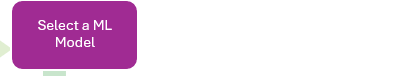

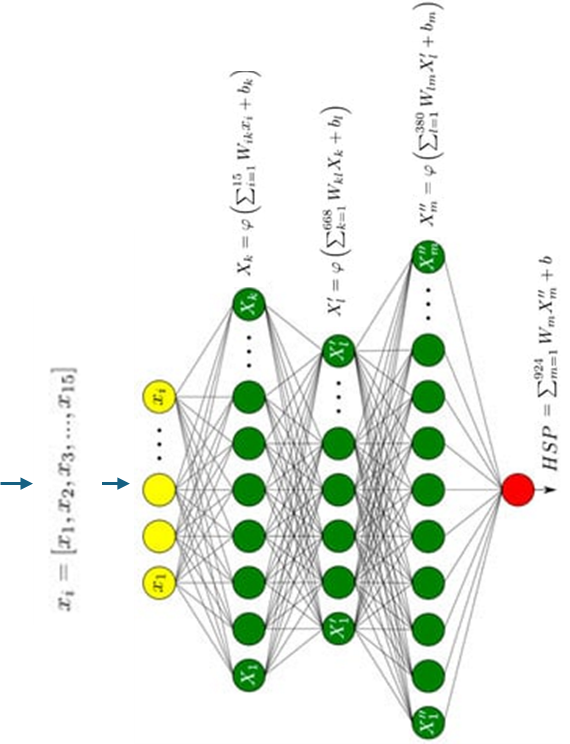

# Train the model 

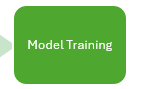

c:\Users\mandart\A_MANDAR_DOCUMENTS\HAM_Wind_Energy\Demonstration\py310gpu\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1200) reached and the optimization hasn't converged yet.
  warnings.warn(


Text(0.5, 1.0, 'Error Vs Epochs')

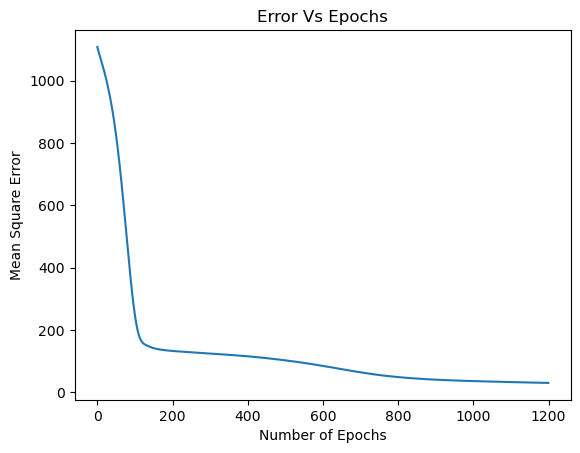

In [44]:
# 3. Initialize the neural network regressor (MLPRegressor)
mlp = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1200, random_state=42)

# 4. Fit the model on the scaled training data
mlp.fit(X_train_scaled, y_train)

plt.figure()
#pd.DataFrame(mlp.loss_curve_).plot()
plt.plot(mlp.loss_curve_)
plt.xlabel('Number of Epochs')
plt.ylabel('Mean Square Error')
plt.title('Error Vs Epochs')



# Evaluation:  Test Generalizability of Model Evaluate the model

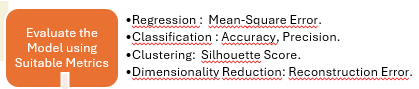

In [47]:
# 5. Predict on the test data
y_pred = mlp.predict(X_test_scaled)

ypred_train=mlp.predict(X_train_scaled)
mse_train = mean_squared_error(y_train,ypred_train)
r2_train = r2_score(y_train, ypred_train)

# 6. Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error on Unseen Test: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

print(f"Mean Squared Error on Train: {mse_train:.4f}")
print(f"R² train Score: {r2_train:.4f}")

Mean Squared Error on Unseen Test: 128635.6945
R² Score: -221.7201
Mean Squared Error on Train: 59.9654
R² train Score: 0.9333


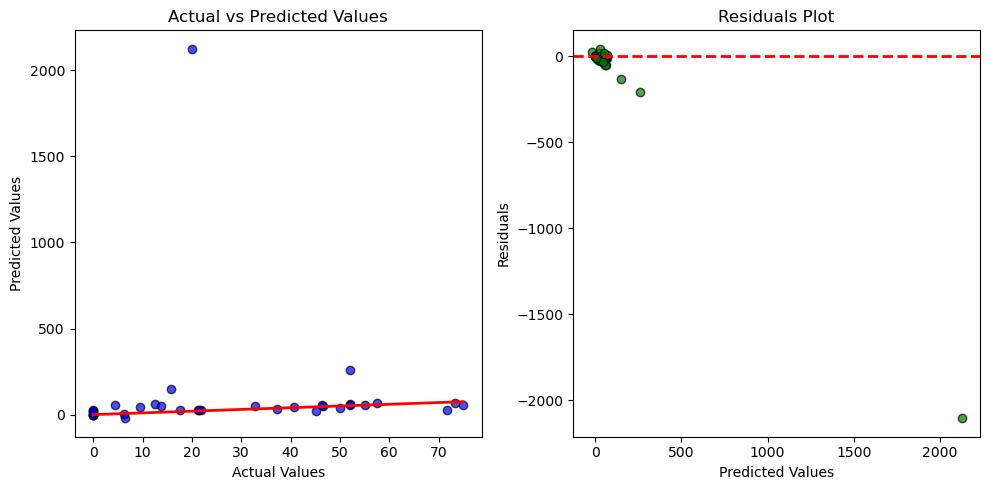

In [45]:
# 7. Plotting Actual vs Predicted Values
plt.figure(figsize=(10, 5))

# Actual vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Diagonal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")

# Residuals plot
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='green', edgecolor='k', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot")

plt.tight_layout()
plt.show()

In [ ]:
# Linear Regression and Gradient Descent.

## Brute force approach to finding the optimal parameters

TASK: Find the values of $\theta_0$ and $\theta_1$ that minimize the mean squared error

In [ ]:
def mean_squared_error(theta0, theta1, x0,x1, y):
    m = len(y)
    J = 0.0
    for i in range(m):
        J += (y[i] - theta0*x0[i] - theta1*x1[i])**2
    return J 

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

x0=data['Concentraton of monomers, x0'].values
x1=data['Concentration of Dimmer X1'].values
y=data['Initial rate of formatio of impurity y'].values

# Define a range of values for theta0 and theta1
theta0_values = np.linspace(0, 2, 100)
theta1_values = np.linspace(0, 10, 100)

# Create a mesh grid from theta0 and theta1 values
theta0_grid, theta1_grid = np.meshgrid(theta0_values, theta1_values)

# Calculate the MSE cost function for each combination of theta0 and theta1
z = mean_squared_error(theta0_grid, theta1_grid, x0,x1, y)

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the MSE cost function
ax.plot_surface(theta0_grid, theta1_grid, z, cmap='coolwarm')

# Add labels to the plot
ax.set_xlabel(r'$\theta_{0}$')
ax.set_ylabel(r'$\theta_{1}$')
ax.set_zlabel('MSE')
#plt.savefig("gridsearch.pdf", bbox_inches='tight')
# Show the plot
plt.show()
print("Minimum value of the cost function is ", np.min(z))

What did you learn form the above excercise ?

## Optimization using gradient descent

### Batch Gradient Descent
Minimize the loss function using gradient descent.

<img src='images/gd.jpg'>

### Gradient descent in single parameters

TASK: Test the effect of initial guess and learning rates

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "monospace",
    "font.monospace": 'Computer Modern Typewriter'
})

# Define the function to minimize
def f(theta):
    return theta**2 + 10*np.sin(theta)

# Define the derivative of the function
def df(theta):
    return 2*theta + 10*np.cos(theta)

# Set the initial point and learning rate
theta0 = -10
learning_rate = 0.1

# Perform gradient descent
x_list = [theta0]
for i in range(1000):
    x_list.append(x_list[-1] - learning_rate*df(x_list[-1]))

# Plot the function and the path of gradient descent
theta = np.linspace(-10, 10, 1000)
plt.plot(theta, f(theta))
plt.scatter(x_list, f(np.array(x_list)), color='r')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$f(\theta)=\theta^{2}+10sin(\theta)$')
#plt.savefig('x2sinxsuccessful.pdf',bbox_inches='tight')
plt.show()


Write down your conclusion from the above task ?

### Gradient descent in two parameters

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "monospace",
    "font.monospace": 'Computer Modern Typewriter'
})

# Define the quadric function to minimize
def f(theta1, theta2):
    return (1-theta1)**2 + 100*(theta2-theta1**2)**2

# Define the partial derivative of the function wrt x and y
def df_dx(theta1, theta2):
    return 2*(200*theta1**3 - 200*theta1*theta2 + theta1 - 1)

def df_dy(theta1, theta2):
    return 200*(theta2-theta1**2)

# Set the initial point and learning rate
theta10 = -3
theta20 = 0
learning_rate = 0.0001

# Perform gradient descent
x_list = [theta10]
y_list = [theta20]
for i in range(1000):
    x_new = x_list[-1] - learning_rate*df_dx(x_list[-1], y_list[-1])
    y_new = y_list[-1] - learning_rate*df_dy(x_list[-1], y_list[-1])
    x_list.append(x_new)
    y_list.append(y_new)

# Plot the function and the path of gradient descent
theta1 = np.linspace(-5, 5, 100)
theta2 = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(theta1, theta2)
Z = f(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='hsv')
ax.scatter(x_list, y_list, f(np.array(x_list),np.array(y_list)), color='black')
plt.xlabel(r"$\theta_1$")
plt.ylabel(r"$\theta_2$")
#plt.savefig('2dfunctiongradientdescent.pdf',bbox_inches='tight')
plt.show()

## Stochastic vs Batch gradient descent

<img src='./images/stochasticGD.png' width=500>

TASK: Implement and compare BGD and SGD in terms of memory and compute time. WHat is the take away ?

### Best fit line using least squares

Task: Plot the cost function in 3D

Task: Introduce some outliers and see how sensitive the fitting it

In [ ]:
from mpl_toolkits import mplot3d

# Generate some random data
np.random.seed(0)
x = np.random.rand(100, 1)
y = 2 + 3 * x + np.random.randn(100, 1)

# Initialize the parameters
w = np.random.randn(1)
b = np.random.randn(1)

# Define the learning rate
learning_rate = 0.1

# Define the number of iterations
num_iterations = 1000

# Initialize the lists to store the values of w and b at each iteration
w_list = [w[0]]
b_list = [b[0]]
cost_list = [np.mean((y - (w*x + b))**2)]

# Perform stochastic gradient descent
for i in range(num_iterations):
    # Select a random data point
    rnd_ind = np.random.randint(0, x.shape[0])
    x_i = x[rnd_ind]
    y_i = y[rnd_ind]

    # Compute the gradient
    y_pred = w * x_i + b
    grad_w = (y_pred - y_i) * x_i
    grad_b = y_pred - y_i

    # Update the parameters
    w = w - learning_rate * grad_w
    b = b - learning_rate * grad_b

    # Store the values of w and b
    w_list.append(w[0])
    b_list.append(b[0])
    cost_list.append(np.mean((y - (w*x + b))**2))

# Plot the data and the line
plt.scatter(x, y, c='b')
plt.xlabel('x')
plt.ylabel('y')

x_line = np.linspace(0, 1, 2)
y_line = w * x_line + b
plt.plot(x_line, y_line, 'r')
#plt.savefig('linearleastsquaredataline.pdf',bbox_inches='tight')
plt.show()

# Plot the history of the optimization in 3D
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(w_list, b_list, cost_list, c='r')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Cost')
#plt.savefig('linearleastsquareparamtrajectory.pdf',bbox_inches='tight')
plt.show()

What do conclude about the sensitivity of least squares to outliers ?

## Models non-linear in feature space

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
filename='data/tab1007.dat'
data = pd.read_fwf(filename)
data.head()
x=data['x'].values
y=data['y'].values
x=x.reshape(-1,1)
y=y.reshape(-1,1)

regr=LinearRegression()
regr.fit(x,y)

plt.scatter(x,y)
plt.plot(x,regr.predict(x))
plt.xlabel('Amount of supplement, x')
plt.ylabel('Growth rate, y')
#plt.savefig('linear2quadraticfit.pdf',bbox_inches='tight')
plt.show()

In [ ]:
xfeatured=np.stack([x.reshape(-1),x.reshape(-1)**2],axis=1)
from sklearn.linear_model import LinearRegression
regr=LinearRegression()
regr.fit(xfeatured,y)
plt.scatter(x,y)
plt.plot(x,regr.predict(xfeatured))
plt.xlabel('Amount of supplement, x')
plt.ylabel('Growth rate, y')
plt.savefig('featuredEngineeredfit.pdf',bbox_inches='tight')
plt.show()

## Models non-linear in feature and parameter space

All the models so far discussed in this lecture have been linear in the parameters.  The following example will show how the method of LS can also be used to fit models that are nonlinear in the parameters.

Biochemical oxygen demand (BOD) is used as a measure of the pollution produced by domestic and industrial wastes. In this test a small portion of the waste is mixed with pure water in a sealed bottle and incubated usually for 5 days at a fixed temperature. The reduction of the dissolved oxygen in the water allows the calculation of the BOD occurring during the incubation period. The data given in table below were obtained from six separate bottles tested over a range of incubation days. Physical considerations suggest that the exponential model 


$$y=\theta_1 (1-e^{-\theta_2 x})$$

should describe the phenomena. The parameters $\theta_2$ would then be the overall rate constant and $\theta_1$ would be the ultimate BOD

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
filename='data/tab1019.dat'
data=pd.read_fwf(filename)
x=data['x'].values
y=data['y'].values
data.head()

$u$ is observation number, $y$ is BOD ($mg/L$) and $x$ is incubation (days) 

In [ ]:
def cost(theta1,theta2,x,y):
    n=len(x)
    J=0.0
    for i in range(n):
        J=J+(y[i]-theta1*(1-np.exp(-theta2*x[i])))**2
    return J

theta1_values = np.linspace(0, 290, 100)
theta2_values = np.linspace(0, 1.4, 100)
cost_landscape=np.zeros((100,100))
for i in range(100):
    for j in range(100):
        cost_landscape[i,j]=cost(theta1_values[j],theta2_values[i],x,y)
Theta1,Theta2=np.meshgrid(theta1_values,theta2_values)
from matplotlib import rcParams
rcParams['figure.figsize'] = 5, 5 # sets plot size

fig = plt.figure()
ax = fig.add_subplot(111)

# Define levels in z-axis where we want lines to appear
levels = np.array([1168,2000,5000,8000,10000,15000,19000])

# Generate a color mapping of the levels we've specified
import matplotlib.cm as cm # matplotlib's color map library
cpf = ax.contourf(Theta1,Theta2,cost_landscape, len(levels), cmap=cm.Reds)

# Set all level lines to black
line_colors = ['black' for l in cpf.levels]

# Make plot and customize axes
cp = ax.contour(Theta1,Theta2,cost_landscape, levels=levels, colors=line_colors)
ax.clabel(cp, fontsize=10, colors=line_colors)
ax.set_xlabel(r'$\theta_{1}$')
_ = ax.set_ylabel(r'$\theta_{2}$')
plt.savefig('costlandscapeBOD.pdf',bbox_inches='tight')

## Optimization using scipy optimizer

In [ ]:
def calc_cost(param,data):
    x=data[:,0]
    y=data[:,1]
    theta1,theta2=param
    n=len(x)
    J=0.0
    for i in range(n):
        J=J+(y[i]-theta1*(1-np.exp(-theta2*x[i])))**2
    return J
from scipy.optimize import minimize

# Example data
data = np.stack([x,y],axis=1)
# Initialize the shape parameters
params = [10, 10]
result = minimize(calc_cost, params, args=(data,),method='L-BFGS-B')
print("Minimized Mean squared error = ",result.fun)
print("Optimal parameters theta1 =",result.x[0], ", theta2=" ,result.x[1])

theta1 = 213.80941166510075
theta2= 0.5472374776689821
for i in range(len(x)):
    ypred=theta1*(1-np.exp(-theta2*x))
plt.scatter(x,y)
plt.plot(x,ypred)
plt.xlabel('Days of incubation, x')
plt.ylabel('Biochemical oxygen demand, y')
#plt.savefig('BODvsIncubation.pdf',bbox_inches='tight')
plt.show()

TASK: If suitable assumptions are made the following model can be derived from chemical kinetic theory for a conservative reaction with $y$ the yield of intermediate product, $x$ the reaction time, and $\theta_1$ and $\theta_2$ the rate constants to be estimated from the experimental data

$$y=\frac{\theta_1}{\theta_1 -\theta_2}(e^{-\theta_2 t}-e^{-\theta_1 t})$$

A chemist wants to obtain the most precise estimate possible of $\theta_1$ and $\theta_2$ from the following data

In [ ]:
import numpy as np
import pandas as pd
t=np.array([10,20,30,40,50,60])
y=np.array([0.20,0.52,0.69,0.64,0.57,0.48])

The reaction is this type reactant $\longrightarrow$ product $\longrightarrow$ by-product  $\theta_1$ is the rate constant of the first reaction and $\theta_2$ of the second reaction. Obtain the least squares estimates for $\theta_1$ and $\theta_2$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Generate sample data
x = np.linspace(0,10,20)
y = (x-5)**3 +3*(x-6)**2
noise=np.random.normal(0,8,y.shape)
y=y+noise
plt.scatter(x,y)
plt.show()

In [ ]:
# Engineering features
xreshaped=x.reshape(-1)
xfeatured=np.stack([xreshaped**0,xreshaped**1,xreshaped**2,xreshaped**3],axis=1)
#theta=np.linalg.inv(np.matmul(xfeatured.T,X))
theta = np.linalg.inv(xfeatured.T.dot(xfeatured)).dot(xfeatured.T).dot(y)
ypred=xfeatured.dot(theta)
plt.scatter(x,y)
plt.plot(x,ypred)
plt.show()

# CONGRATULATIONS !!!
For successfully completing the notebook